<a href="https://colab.research.google.com/github/chanhyeong00/study_for_deep_learning_mini_project/blob/main/redwine_quality_prediction/redwine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
wine_data = pd.read_csv('winequality-red.csv')

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


빠진 데이터는 없다.
feature는 총 11개이다

In [5]:
wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

퀄리티는 3,4,5,6,7,8 로 6개이다. 이제 데이터를 분리하겠다.

In [6]:
X, y = wine_data.iloc[:, :-1], wine_data.iloc[:, -1]

In [7]:
X[:2], y[:2]

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70          0.0             1.9      0.076   
 1            7.8              0.88          0.0             2.6      0.098   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 
    alcohol  
 0      9.4  
 1      9.8  ,
 0    5
 1    5
 Name: quality, dtype: int64)

***

### 데이터 전처리

**훈련세트, 테스트세트 분리**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1279, 11) (320, 11)
(1279,) (320,)


**데이터 스케일 맞추기**

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
train_sc = sc.transform(X_train)
test_sc = sc.transform(X_test)

In [11]:
from sklearn.preprocessing import Normalizer
nl = Normalizer()
nl.fit(X_train)
train_nl = nl.transform(X_train)
test_nl = nl.transform(X_test)

<Axes: >

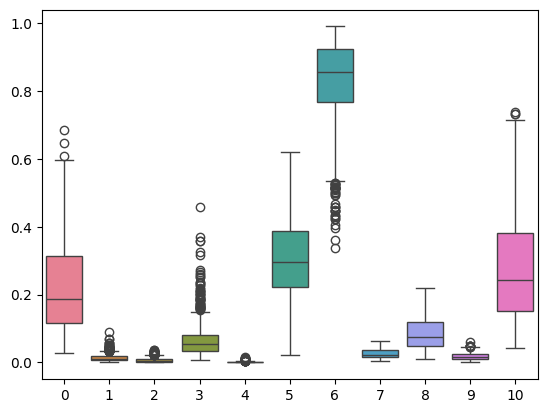

In [12]:
sns.boxplot(train_nl)

#### **IQR(InterQualtile Range)로 이상치 제거한 데이터**

**이상치 없앤 데이터**

3번째 열과 6번째 열이 제일 많이 튀는 거 같으므로 2개 열만 이상치 제거하겠다.

In [13]:
wine_data = pd.read_csv('winequality-red.csv')

In [14]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight

  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight

  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
lst = set()
column_lst = list(wine_data.columns)

outlier_idx1 = get_outlier(df=wine_data, column='residual sugar', weight=1.5)
outlier_idx2 = get_outlier(df=wine_data, column='total sulfur dioxide', weight=1.5)
for o1 in outlier_idx1:
  lst.add(o1)
for o2 in outlier_idx2:
  lst.add(o2)
lst = list(lst)
print(len(lst))

195


In [15]:
wine_data.drop(lst, axis=0, inplace=True)

In [16]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1404 non-null   float64
 1   volatile acidity      1404 non-null   float64
 2   citric acid           1404 non-null   float64
 3   residual sugar        1404 non-null   float64
 4   chlorides             1404 non-null   float64
 5   free sulfur dioxide   1404 non-null   float64
 6   total sulfur dioxide  1404 non-null   float64
 7   density               1404 non-null   float64
 8   pH                    1404 non-null   float64
 9   sulphates             1404 non-null   float64
 10  alcohol               1404 non-null   float64
 11  quality               1404 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 142.6 KB


In [17]:
X, y = wine_data.iloc[:, :-1], wine_data.iloc[:, -1]

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn.preprocessing import Normalizer
nl = Normalizer()
nl.fit(X_train2)
train_nl2 = nl.transform(X_train2)
test_nl2 = nl.transform(X_test2)

<Axes: >

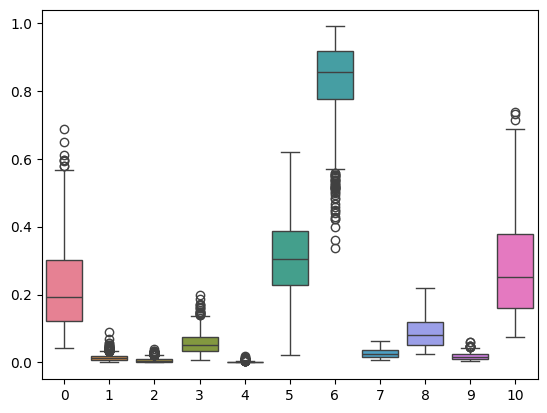

In [20]:
sns.boxplot(train_nl2)

<Axes: ylabel='total sulfur dioxide'>

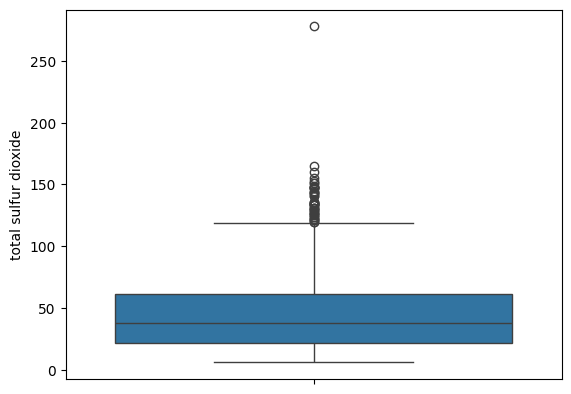

In [21]:
sns.boxplot(X_train['total sulfur dioxide'])

<Axes: ylabel='total sulfur dioxide'>

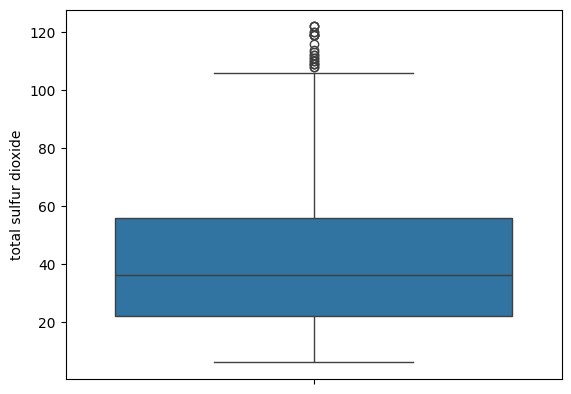

In [22]:
sns.boxplot(X_train2['total sulfur dioxide'])

<Axes: ylabel='residual sugar'>

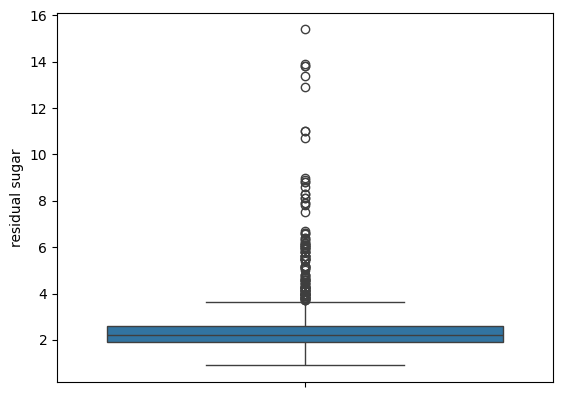

In [23]:
sns.boxplot(X_train['residual sugar'])

<Axes: ylabel='residual sugar'>

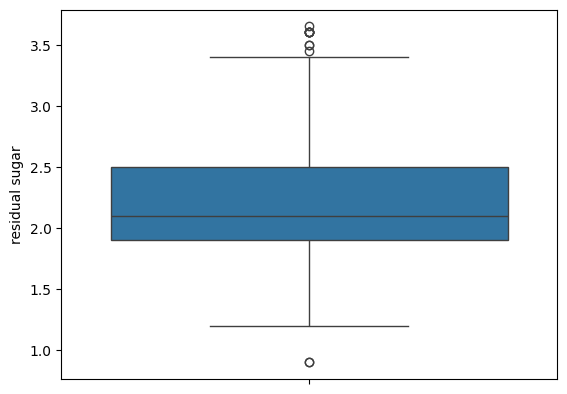

In [24]:
sns.boxplot(X_train2['residual sugar'])

확실히 이상치가 많이 제거된 것을 볼 수 있다.

***

### 모델 구성

array([5, 6, 7, 4, 8, 3])

#### **다중 분류를 위한 로지스틱 회귀**

In [25]:
# 이상치 제거 x
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_nl, y_train)
print(lr.score(train_nl, y_train))
print(lr.score(test_nl, y_test))

0.5168100078186083
0.446875


In [26]:
# 이상치 제거 데이터
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_nl2, y_train2)
print(lr.score(train_nl2, y_train2))
print(lr.score(test_nl2, y_test2))

0.5057880676758683
0.47330960854092524


#### **결정트리**

In [27]:
from sklearn.tree import DecisionTreeClassifier
# 이상치 제거 x
dt = DecisionTreeClassifier()
dt.fit(train_nl, y_train)
print(dt.score(train_nl, y_train))
print(dt.score(test_nl, y_test))

1.0
0.565625


In [28]:
from sklearn.tree import DecisionTreeClassifier
# 이상치 제거
dt = DecisionTreeClassifier()
dt.fit(train_nl2, y_train2)
print(dt.score(train_nl2, y_train2))
print(dt.score(test_nl2, y_test2))

1.0
0.5551601423487544


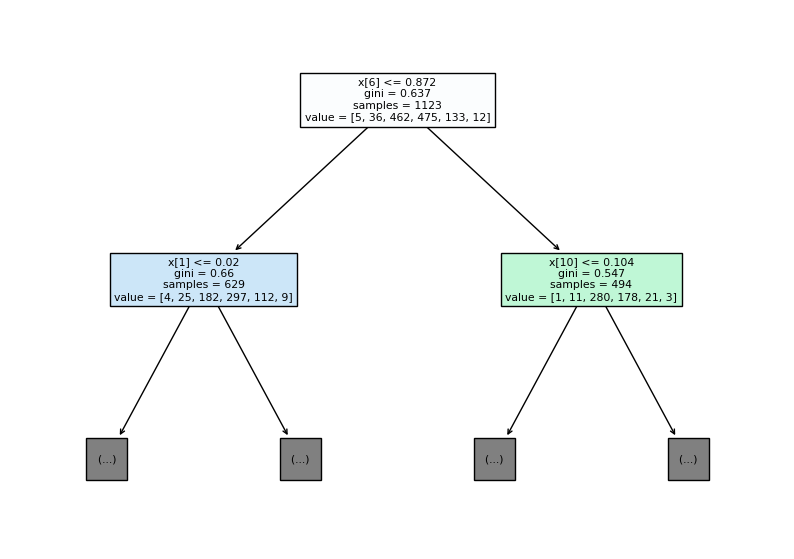

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True)
plt.show()

훈련 세트는 전부 예측하지만 테스트 세트 점수는 매우 낮은 과대적합이다.

그리고 이상치를 찾아 삭제한 데이터가 좀 더 좋은 성능을 보이는 거 같다.

가지치기를 통해 과대적합을 풀어보자


In [30]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(train_nl2, y_train2)
print(dt.score(train_nl2, y_train2))
print(dt.score(test_nl2, y_test2))

0.9162956366874443
0.5516014234875445


과대적합이 좀 괜찮아지긴 했지만 아직 개선헤야할 게 많다.

**랜덤포레스트**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
# 이상치 제거
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, max_depth=7)
rf.fit(train_nl2, y_train2)
print(rf.oob_score_)

scores = cross_validate(rf, train_nl2, y_train2, return_train_score=True, n_jobs=-1)
print(scores)

print(rf.score(train_nl2, y_train2),rf.score(test_nl2, y_test2))

0.6046304541406946
{'fit_time': array([1.04500914, 1.38991952, 1.9021399 , 1.78530717, 1.24429107]), 'score_time': array([0.10101414, 0.13550043, 0.07662392, 0.11987901, 0.03751397]), 'test_score': array([0.60888889, 0.56444444, 0.64444444, 0.62053571, 0.625     ]), 'train_score': array([0.81069042, 0.83853007, 0.83964365, 0.83314794, 0.85539488])}
0.8183437221727515 0.5800711743772242


과대적합이 좀 괜찮아지긴 했지만 아직 개선해야할 게 많다.(이 이상은 어떻게 해결해야할지 모르겠다..)

그렇다면 신경망을 사용해 조금 더 복잡한 모델을 만들어 훈련을 해보겠다.

***

### 딥러닝으로 다중분류 진행

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(None, 11), activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 64)          768       
                                                                 
 dense_1 (Dense)             (None, None, 64)          4160      
                                                                 
 dense_2 (Dense)             (None, None, 6)           390       
                                                                 
Total params: 5318 (20.77 KB)
Trainable params: 5318 (20.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(y_train2)
y_train2 = e.transform(y_train2).astype(np.float32)

y_test2 = e.transform(y_test2).astype(np.float32)
print(y_train2[:100])

[4. 3. 2. 2. 4. 3. 2. 4. 2. 3. 2. 2. 2. 3. 1. 3. 3. 3. 4. 3. 2. 3. 2. 3.
 3. 2. 2. 3. 3. 2. 2. 3. 3. 4. 3. 3. 2. 3. 2. 2. 3. 3. 2. 2. 2. 2. 2. 2.
 2. 4. 4. 3. 2. 3. 3. 2. 3. 3. 3. 4. 3. 3. 2. 3. 2. 2. 3. 3. 3. 1. 3. 2.
 3. 4. 3. 2. 3. 3. 4. 2. 2. 2. 2. 2. 3. 3. 3. 4. 3. 1. 3. 3. 2. 2. 2. 2.
 2. 2. 2. 2.]


In [35]:
history = model.fit(train_nl2, y_train2, epochs=100, validation_data=(test_nl2, y_test2))

Epoch 1/100
36/36 [==============================] - 2s 20ms/step - loss: 1.5832 - accuracy: 0.3108 - val_loss: 1.3705 - val_accuracy: 0.4413
Epoch 2/100
36/36 [==============================] - 0s 8ms/step - loss: 1.2586 - accuracy: 0.4595 - val_loss: 1.2377 - val_accuracy: 0.4306
Epoch 3/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1800 - accuracy: 0.4435 - val_loss: 1.2032 - val_accuracy: 0.4306
Epoch 4/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1531 - accuracy: 0.4871 - val_loss: 1.1936 - val_accuracy: 0.4662
Epoch 5/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1389 - accuracy: 0.4773 - val_loss: 1.1911 - val_accuracy: 0.4555
Epoch 6/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1294 - accuracy: 0.4844 - val_loss: 1.1924 - val_accuracy: 0.4555
Epoch 7/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1252 - accuracy: 0.4782 - val_loss: 1.1829 - val_accuracy: 0.4804
Epoch 8/100


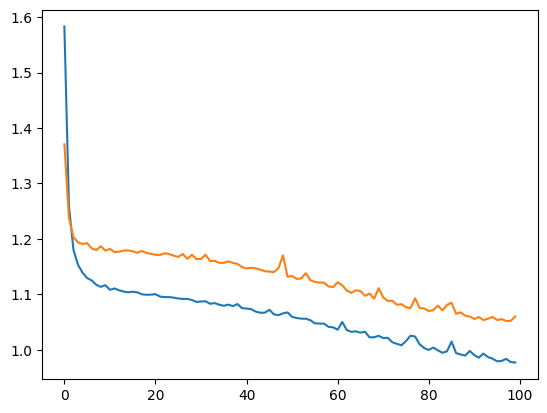

In [36]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


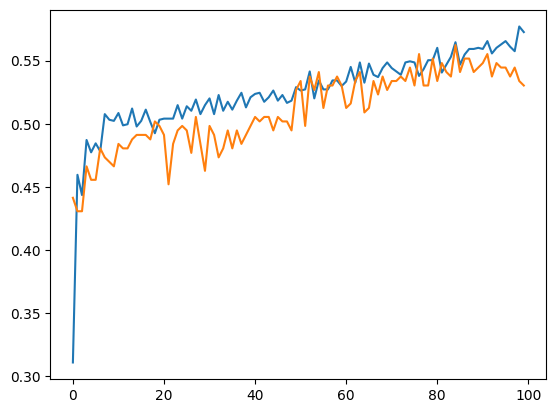

In [37]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


계속해서 분류로 결과를 보니 회귀로 해결하는 것이 더 좋을 거 같다.

정확한 값은 나오지 않지만 비슷한 값을 예측할 것이다.

***

### 딥러닝 회귀로 해결

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

In [45]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(None, 11), activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse',
              metrics=['mse'])

history = model.fit(train_nl2, y_train2, epochs=100, validation_data=(test_nl2, y_test2))

Epoch 1/100
36/36 [==============================] - 1s 8ms/step - loss: 27.5887 - mse: 27.5887 - val_loss: 19.7199 - val_mse: 19.7199
Epoch 2/100
36/36 [==============================] - 0s 13ms/step - loss: 10.0328 - mse: 10.0328 - val_loss: 1.1352 - val_mse: 1.1352
Epoch 3/100
36/36 [==============================] - 0s 8ms/step - loss: 0.8605 - mse: 0.8605 - val_loss: 0.6127 - val_mse: 0.6127
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 0.7297 - mse: 0.7297 - val_loss: 0.6045 - val_mse: 0.6045
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.7170 - mse: 0.7170 - val_loss: 0.5975 - val_mse: 0.5975
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 0.7072 - mse: 0.7072 - val_loss: 0.5968 - val_mse: 0.5968
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 0.7046 - mse: 0.7046 - val_loss: 0.5893 - val_mse: 0.5893
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6

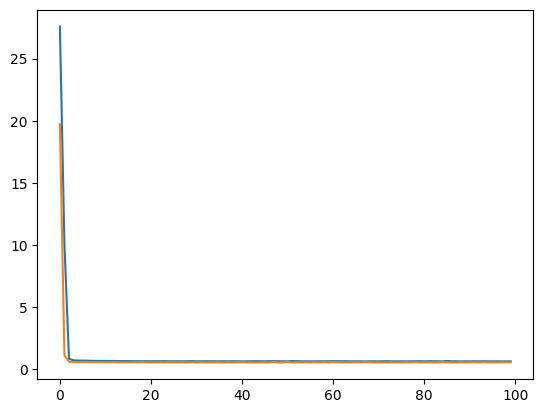

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [48]:
from sklearn.metrics import mean_squared_error
pred = model.predict(test_nl2)

mse = mean_squared_error(y_test2, pred)
print(mse)

9/9 [==============================] - 0s 11ms/step
0.5724018617931014


오차도 매우 작다!!!

In [47]:
model.predict(test_nl2[:3])

1/1 [==============================] - 0s 68ms/step


array([[5.8013597],
       [5.7444673],
       [5.8895793]], dtype=float32)

3개다 6이고, 반올림 하면 6에 가까움

**레이블이 숫자가 아닌 문자열이거나, 라벨링 된 문제라면 분류를 사용하는 게 맞지만**

**이 데이터의 경우, 품질을 추정하는 것으로 회귀 문제로 예측한 다음, 가까운 값으로 예측하는 것이 맞다**

***
분류로 뻘짓을 하며... 어떨 때 분류를 쓰고 어떨 때 회귀를 쓰는지 깨달았다..

다음부턴 이런 실수 없이 시간 버리지 말자